# HW4
We will be working on a very cool problem which is classifying hand signs. In each image the hand is holding certain number of fingers up. The number of fingers held by the hand is the class number. The original dataset is in a format call h5 format. It is an efficient format to store and organize large amounts of data. [Click here to read more about it](https://en.wikipedia.org/wiki/Hierarchical_Data_Format). The following function `load_dataset()` is ready for you to use. It will return four variables in the following order: X_train, Y_train, X_test, Y_test. Hence, your data is already splitted and there is no need for you to split it.

You can download the training datafile here https://drive.google.com/open?id=1vcbjJMj4RuuuqayUu40ScHJdSY4DZOrj

You can download the test datafile here https://drive.google.com/open?id=1rQ1RCIBzw7ho_n6x0vbMzdZ8fAzi1hIQ

Make sure you have both on the same directory as your notebook

In [1]:
import h5py
import numpy as np

def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((train_set_y_orig.shape[0]),1)
    test_set_y_orig = test_set_y_orig.reshape((test_set_y_orig.shape[0],1))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig




In [2]:
## I am trying to output train_set_x_orig
load_dataset()[0]

array([[[[227, 220, 214],
         [227, 221, 215],
         [227, 222, 215],
         ...,
         [232, 230, 224],
         [231, 229, 222],
         [230, 229, 221]],

        [[227, 221, 214],
         [227, 221, 215],
         [228, 221, 215],
         ...,
         [232, 230, 224],
         [231, 229, 222],
         [231, 229, 221]],

        [[227, 221, 214],
         [227, 221, 214],
         [227, 221, 215],
         ...,
         [232, 230, 224],
         [231, 229, 223],
         [230, 229, 221]],

        ...,

        [[119,  81,  51],
         [124,  85,  55],
         [127,  87,  58],
         ...,
         [210, 211, 211],
         [211, 212, 210],
         [210, 211, 210]],

        [[119,  79,  51],
         [124,  84,  55],
         [126,  85,  56],
         ...,
         [210, 211, 210],
         [210, 211, 210],
         [209, 210, 209]],

        [[119,  81,  51],
         [123,  83,  55],
         [122,  82,  54],
         ...,
         [209, 210, 210],
        

Generate 20 random numbers between 0 and the length of the training dataset. Plot 20 images from the dataset using these 20 random numbers as indicies to the training dataset. You will need to plot them on 5 rows and 4 columns. In addition, each image will have a title that says `this image belons to class number X`, replace X by the correct class number from the training labels.

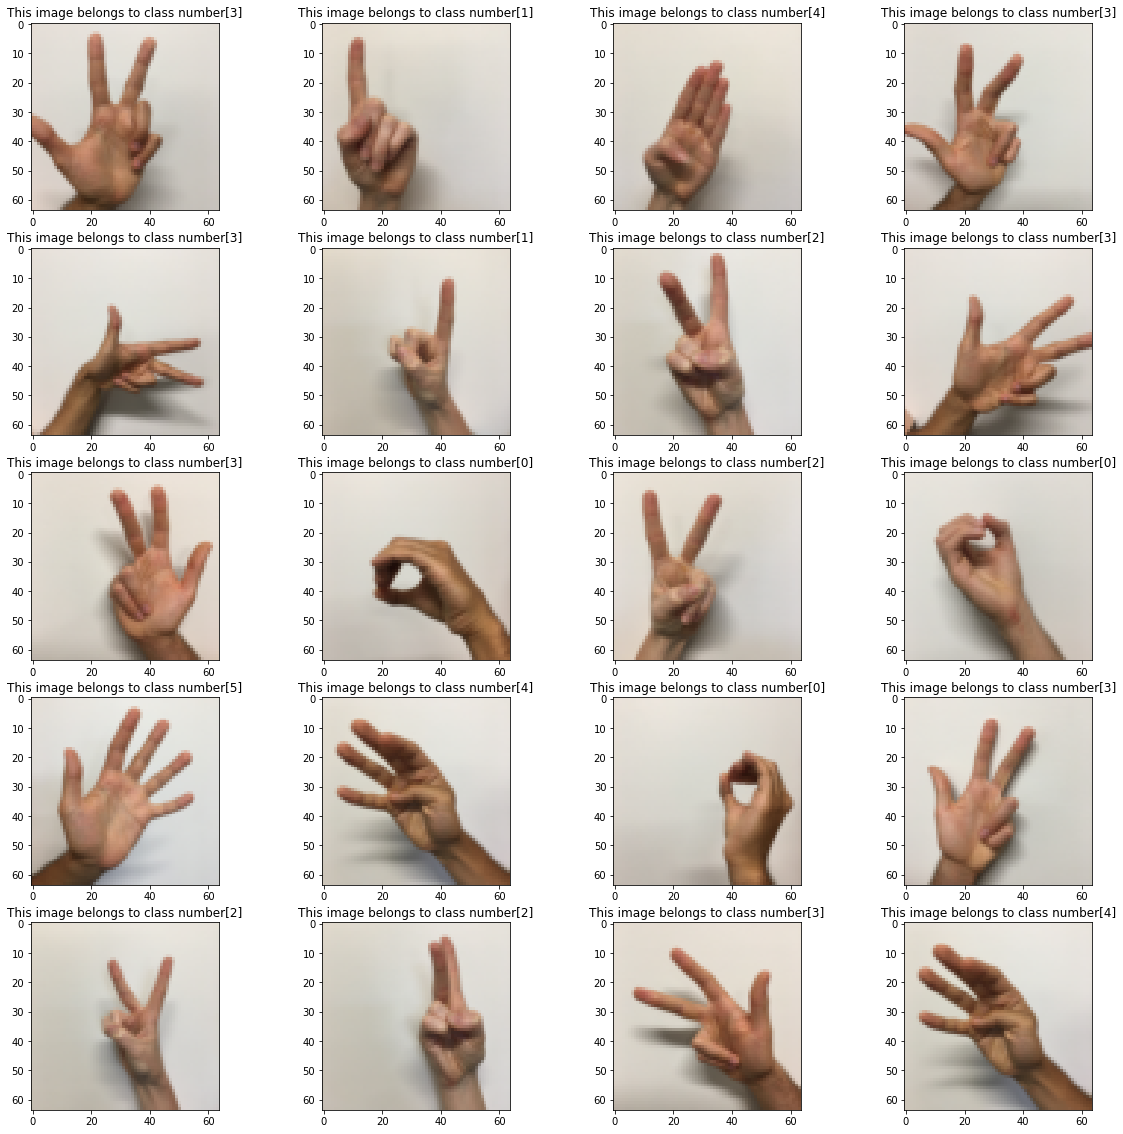

In [3]:
# Plot here 
indicies = np.random.randint(low=0, high=len(load_dataset()[0]), size=20)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,20))
j = 1
for i in indicies:
    plt.subplot(5,4,j)
    plt.imshow(load_dataset()[0][i])
    plt.title('This image belongs to class number' + str(load_dataset()[1][i]))
    j = j + 1

How many classes does the training and test dataset have?

In [4]:
# solve here
## training dataset
print("training dataset classes are " + str(set(load_dataset()[1].flatten())))
## test dataset
print("test dataset classes are " + str(set(load_dataset()[3].flatten())))

training dataset classes are {0, 1, 2, 3, 4, 5}
test dataset classes are {0, 1, 2, 3, 4, 5}


What is the dimension of the training dataset and test dataset?

In [5]:
# solve here
print(load_dataset()[0].shape)
print(load_dataset()[2].shape)

(1080, 64, 64, 3)
(120, 64, 64, 3)


As you can see in the dimension (number_images X length X width X RGB), each image has 3 dimensions .. number of pixels in length and width as well as RGB contrast. We needed to flatten both the training and the test dataset so that we can feed to our ML models. To flatten an image, check the following link. https://stackoverflow.com/questions/36967920/numpy-flatten-rgb-image-array

In [6]:
# solve here
x_train = load_dataset()[0].flatten().reshape(1080, 12288)
x_test = load_dataset()[2].flatten().reshape(120, 12288)
print (x_train.shape)
print (x_test.shape)
x_train

(1080, 12288)
(120, 12288)


array([[227, 220, 214, ..., 208, 209, 209],
       [238, 232, 223, ..., 215, 204, 192],
       [228, 220, 208, ..., 211, 207, 202],
       ...,
       [235, 226, 216, ..., 200, 192, 182],
       [233, 226, 217, ..., 204, 201, 198],
       [230, 220, 209, ..., 202, 199, 197]], dtype=uint8)

Now we need to normalize the training and test dataset. The pixels are integers. We need them to be float between 0 and 1. You need to divide each of the two matrices by its max. That will produce a normalized image datasets

In [7]:
# Solve Here
### I assume you want us to independently normalize each feature
from sklearn.preprocessing import normalize
x_train_nor = normalize(x_train, norm='max', axis=0)
x_test_nor = normalize(x_test, norm='max', axis=0)
print("x_train_nor",x_train_nor)
print("x_test_nor",x_train_nor)

x_train_nor [[0.93801653 0.93220339 0.93449782 ... 0.90434783 0.9587156  0.96759259]
 [0.98347107 0.98305085 0.97379913 ... 0.93478261 0.93577982 0.88888889]
 [0.94214876 0.93220339 0.90829694 ... 0.9173913  0.94954128 0.93518519]
 ...
 [0.97107438 0.95762712 0.94323144 ... 0.86956522 0.88073394 0.84259259]
 [0.96280992 0.95762712 0.94759825 ... 0.88695652 0.92201835 0.91666667]
 [0.95041322 0.93220339 0.91266376 ... 0.87826087 0.91284404 0.91203704]]
x_test_nor [[0.93801653 0.93220339 0.93449782 ... 0.90434783 0.9587156  0.96759259]
 [0.98347107 0.98305085 0.97379913 ... 0.93478261 0.93577982 0.88888889]
 [0.94214876 0.93220339 0.90829694 ... 0.9173913  0.94954128 0.93518519]
 ...
 [0.97107438 0.95762712 0.94323144 ... 0.86956522 0.88073394 0.84259259]
 [0.96280992 0.95762712 0.94759825 ... 0.88695652 0.92201835 0.91666667]
 [0.95041322 0.93220339 0.91266376 ... 0.87826087 0.91284404 0.91203704]]


Now you can apply ML. Start with a baseline model such as logistic regression. Fit the model, then evaluate the model by calculating the accuracy and the confusion matrix for the training data and test data. Note, fitting the model may take longer than a minute

In [8]:
# logistic regression
y_train = load_dataset()[1]
y_test = load_dataset()[3]
from sklearn.linear_model import LogisticRegression
logis_model = LogisticRegression()
logis_model.fit(x_train_nor, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
### accuracy
print(logis_model.score(x_train_nor, y_train))
print(logis_model.score(x_test_nor, y_test))

1.0
0.8833333333333333


[[20  0  0  0  0  0]
 [ 0 20  0  0  0  0]
 [ 0  2 17  1  0  0]
 [ 1  0  0 19  0  0]
 [ 0  0  2  2 13  3]
 [ 0  0  1  1  1 17]]


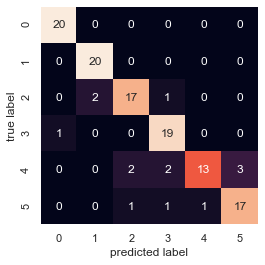

In [10]:
###confusion matrix for test
from sklearn import metrics
import seaborn as sns; sns.set() 
predictions = logis_model.predict(x_test_nor)
cm = metrics.confusion_matrix(y_test, predictions)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,xticklabels=range(6),yticklabels=range(6))
print(cm) 
plt.ylabel('true label')
plt.xlabel('predicted label');

Use Keras to build a small neural network. Number of hidden layers is less than 5 and each layer should have between 5 and 10 neurons. The loss for a multiclass keras problem is called `categorical_crossentropy`

**Note**: You will need to convert the labels using the one hot class encoder as we did in the lecture

In [11]:
# Solve Here
import keras
from keras import layers

model = keras.Sequential()
model.add(keras.layers.Dense(10,input_dim = 12288,activation = "relu"))
model.add(keras.layers.Dense(9,activation = "relu"))
model.add(keras.layers.Dense(8,activation = "relu"))
model.add(keras.layers.Dense(8,activation = "relu"))

model.add(keras.layers.Dense(6,activation = "softmax"))


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# np.expand_dims(y_train,axis =1)

In [13]:
# y_test

In [14]:
# prepare data for tensorflow multi labels
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(y_train)
onehot_train = enc.transform(y_train).toarray()
onehot_train

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [15]:
### set the model to train
model.compile(loss = "categorical_crossentropy",optimizer = 'adam',metrics = ['accuracy'])

In [16]:
model.fit(x_train_nor,onehot_train,epochs = 100, batch_size = 10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1080/1080 [==============================] - 3s 3ms/step - loss: 1.8090 - acc: 0.1611
Epoch 2/100
1080/1080 [==============================] - 1s 1ms/step - loss: 1.7920 - acc: 0.1593
Epoch 3/100
1080/1080 [==============================] - 1s 1ms/step - loss: 1.7920 - acc: 0.1546
Epoch 4/100
1080/1080 [==============================] - 1s 1ms/step - loss: 1.7920 - acc: 0.1583
Epoch 5/100
1080/1080 [==============================] - 1s 1ms/step - loss: 1.7921 - acc: 0.1444
Epoch 6/100
1080/1080 [==============================] - 1s 1ms/step - loss: 1.7920 - acc: 0.1537
Epoch 7/100
1080/1080 [==============================] - 1s 1ms/step - loss: 1.7921 - acc: 0.1630
Epoch 8/100
1080/1080 [==============================] - 1s 1ms/step - loss: 1.7921 - acc: 0.1491
Epoch 9/100
1080/1080 [==============================] - 1s 1ms/step - loss: 1.7921 - acc: 0.1435
Epoch 10/100
1080/1080 [==============================] - 1s 1ms/step 

Did you notice that the learning is slow? As if it is not moving? That is because of the learning rate. Change the compiling line for the model to `model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])` so that you can decrease the learning rate. Moreover, this is a good chance to read about the different optimizers type. Check this link.
https://medium.com/datadriveninvestor/overview-of-different-optimizers-for-neural-networks-e0ed119440c3

Run your network for at least 300 epochs and use batch_size=100

What is the training and validation accuracy and confusion matrix for both?

**Note this will take few minutes to finish**

In [17]:
# Solve Here
model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])
model.fit(x_train_nor,onehot_train,epochs = 300, batch_size = 100)

Epoch 1/300
1080/1080 [==============================] - 1s 1ms/step - loss: 1.7918 - acc: 0.1667
Epoch 2/300
1080/1080 [==============================] - 0s 182us/step - loss: 1.7918 - acc: 0.1667
Epoch 3/300
1080/1080 [==============================] - 0s 220us/step - loss: 1.7918 - acc: 0.1667
Epoch 4/300
1080/1080 [==============================] - 0s 182us/step - loss: 1.7918 - acc: 0.1667
Epoch 5/300
1080/1080 [==============================] - 0s 180us/step - loss: 1.7918 - acc: 0.1667
Epoch 6/300
1080/1080 [==============================] - 0s 183us/step - loss: 1.7918 - acc: 0.1667
Epoch 7/300
1080/1080 [==============================] - 0s 180us/step - loss: 1.7918 - acc: 0.1667
Epoch 8/300
1080/1080 [==============================] - 0s 187us/step - loss: 1.7918 - acc: 0.1667
Epoch 9/300
1080/1080 [==============================] - 0s 205us/step - loss: 1.7918 - acc: 0.1667
Epoch 10/300
1080/1080 [==============================] - 0s 200us/step - loss: 1.7918 - acc: 0.1667
E

In [18]:
#### model evaluation 
onehot_test = enc.transform(y_test).toarray()
train_evaluate = model.evaluate(x_train_nor,onehot_train)
test_evaluate = model.evaluate(x_test_nor,onehot_test)
print("training set loss is ",train_evaluate[0],"training set accuracy is ",train_evaluate[1])
print("test set loss is ",test_evaluate[0],"test set accuracy is ",test_evaluate[1])

120/120 [==============================] - 0s 123us/step
training set loss is  1.7917595024462099 training set accuracy is  0.16666666672185615
test set loss is  1.7917594989140828 test set accuracy is  0.16666666716337203


[[180   0   0   0   0   0]
 [180   0   0   0   0   0]
 [180   0   0   0   0   0]
 [180   0   0   0   0   0]
 [180   0   0   0   0   0]
 [180   0   0   0   0   0]]


Text(0.5, 1, 'confusion matrix for training set')

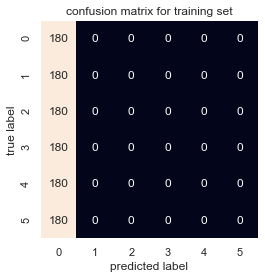

In [19]:
###confusion matrix of training set
training_predictions = model.predict_classes(x_train_nor)
cm_train = metrics.confusion_matrix(y_train, training_predictions)
print(cm_train)

sns.heatmap(cm_train, square=True, annot=True, fmt='d', cbar=False,xticklabels=range(6),yticklabels=range(6))
plt.ylabel('true label')
plt.xlabel('predicted label');
plt.title('confusion matrix for training set')


[[20  0  0  0  0  0]
 [20  0  0  0  0  0]
 [20  0  0  0  0  0]
 [20  0  0  0  0  0]
 [20  0  0  0  0  0]
 [20  0  0  0  0  0]]


Text(0.5, 1, 'confusion matrix for test set')

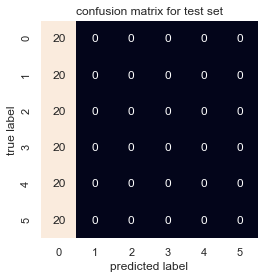

In [20]:
test_predictions = model.predict_classes(x_test_nor)
cm_test = metrics.confusion_matrix(y_test, test_predictions)
print(cm_test)

sns.heatmap(cm_test, square=True, annot=True, fmt='d', cbar=False,xticklabels=range(6),yticklabels=range(6))
plt.ylabel('true label')
plt.xlabel('predicted label');
plt.title('confusion matrix for test set')

Build a new model and increase the number of layers and neurons .. maybe 7 or 8 layers with number of neurons between 200 and 1000. Do you see a difference in the accuracy?


What is the training and validation accuracy and confusion matrix for both?

In [21]:
# NEW MODEL

model2 = keras.Sequential()

model2.add(keras.layers.Dense(1000,input_dim = 12288,activation = "relu"))
model2.add(keras.layers.Dense(900,activation = "relu"))
model2.add(keras.layers.Dense(900,activation = "relu"))
model2.add(keras.layers.Dense(800,activation = "relu"))
model2.add(keras.layers.Dense(700,activation = "relu"))
model2.add(keras.layers.Dense(600,activation = "relu"))
model2.add(keras.layers.Dense(500,activation = "relu"))
model2.add(keras.layers.Dense(300,activation = "relu"))

model2.add(keras.layers.Dense(6,activation = "softmax"))

model2.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])
model2.fit(x_train_nor,onehot_train,epochs = 300, batch_size = 100)

Epoch 1/300
1080/1080 [==============================] - 11s 10ms/step - loss: 1.7987 - acc: 0.1880
Epoch 2/300
1080/1080 [==============================] - 7s 6ms/step - loss: 1.7840 - acc: 0.1694
Epoch 3/300
1080/1080 [==============================] - 7s 6ms/step - loss: 1.7310 - acc: 0.2667
Epoch 4/300
1080/1080 [==============================] - 7s 6ms/step - loss: 1.6515 - acc: 0.3148
Epoch 5/300
1080/1080 [==============================] - 7s 6ms/step - loss: 1.5909 - acc: 0.3269
Epoch 6/300
1080/1080 [==============================] - 7s 6ms/step - loss: 1.4770 - acc: 0.3787
Epoch 7/300
1080/1080 [==============================] - 7s 6ms/step - loss: 1.4215 - acc: 0.4213
Epoch 8/300
1080/1080 [==============================] - 7s 6ms/step - loss: 1.3642 - acc: 0.4333
Epoch 9/300
1080/1080 [==============================] - 7s 6ms/step - loss: 1.2874 - acc: 0.4611
Epoch 10/300
1080/1080 [==============================] - 7s 6ms/step - loss: 1.2076 - acc: 0.5185
Epoch 11/300
1080

In [22]:
#### newmodel evaluation 
train_evaluate2 = model2.evaluate(x_train_nor,onehot_train)
test_evaluate2 = model2.evaluate(x_test_nor,onehot_test)
print("training set loss is ",train_evaluate2[0],"training set accuracy is ",train_evaluate2[1])
print("test set loss is ",test_evaluate2[0],"test set accuracy is ",test_evaluate2[1])

120/120 [==============================] - 0s 874us/step
training set loss is  6.050573184539745e-05 training set accuracy is  1.0
test set loss is  0.6086371141796311 test set accuracy is  0.924999996026357


[[180   0   0   0   0   0]
 [  0 180   0   0   0   0]
 [  0   0 180   0   0   0]
 [  0   0   0 180   0   0]
 [  0   0   0   0 180   0]
 [  0   0   0   0   0 180]]


Text(0.5, 1, 'confusion matrix for training set')

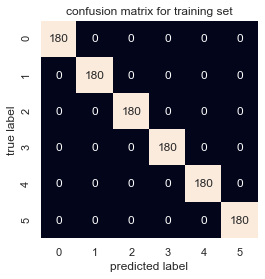

In [23]:
####new model confusion matrix
training_predictions2 = model2.predict_classes(x_train_nor)
training_predictions2

cm_train2 = metrics.confusion_matrix(y_train, training_predictions2)
print(cm_train2)

sns.heatmap(cm_train2, square=True, annot=True, fmt='d', cbar=False,xticklabels=range(6),yticklabels=range(6))
plt.ylabel('true label')
plt.xlabel('predicted label');
plt.title('confusion matrix for training set')

[[20  0  0  0  0  0]
 [ 0 20  0  0  0  0]
 [ 0  1 17  1  0  1]
 [ 0  0  0 20  0  0]
 [ 0  0  0  3 15  2]
 [ 0  0  0  1  0 19]]


Text(0.5, 1, 'confusion matrix for test set')

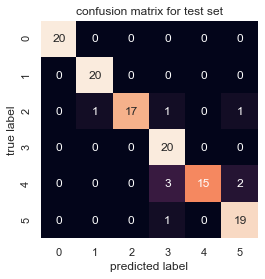

In [24]:
test_predictions2 = model2.predict_classes(x_test_nor)
test_predictions2

cm_test2 = metrics.confusion_matrix(y_test, test_predictions2)
print(cm_test2)

sns.heatmap(cm_test2, square=True, annot=True, fmt='d', cbar=False,xticklabels=range(6),yticklabels=range(6))
plt.ylabel('true label')
plt.xlabel('predicted label');
plt.title('confusion matrix for test set')

**Bonus**

See if you can change some of the parameters so that you can reach for a validation accuracy of at least 92%

In [25]:
#### The accuracy of training set is 1, while the test set is 92.49%, the mmodel is overfitting. I am going to reduce the layers 
####and nurons or increase the batch size to solve this problem.
# NEW MODEL

model3 = keras.Sequential()

model3.add(keras.layers.Dense(800,input_dim = 12288,activation = "relu"))
model3.add(keras.layers.Dense(700,activation = "relu"))
model3.add(keras.layers.Dense(600,activation = "relu"))
model3.add(keras.layers.Dense(500,activation = "relu"))
model3.add(keras.layers.Dense(300,activation = "relu"))
model3.add(keras.layers.Dense(200,activation = "relu"))

model3.add(keras.layers.Dense(6,activation = "softmax"))

model3.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(lr=0.00001), metrics=['accuracy'])
model3.fit(x_train_nor,onehot_train,epochs = 300, batch_size = 100)

Epoch 1/300
1080/1080 [==============================] - 7s 6ms/step - loss: 1.8048 - acc: 0.1704
Epoch 2/300
1080/1080 [==============================] - 4s 4ms/step - loss: 1.7563 - acc: 0.3435
Epoch 3/300
1080/1080 [==============================] - 4s 4ms/step - loss: 1.7310 - acc: 0.3463
Epoch 4/300
1080/1080 [==============================] - 4s 4ms/step - loss: 1.7041 - acc: 0.3926
Epoch 5/300
1080/1080 [==============================] - 5s 4ms/step - loss: 1.6794 - acc: 0.4167
Epoch 6/300
1080/1080 [==============================] - 5s 5ms/step - loss: 1.6438 - acc: 0.4481
Epoch 7/300
1080/1080 [==============================] - 5s 5ms/step - loss: 1.6162 - acc: 0.4815
Epoch 8/300
1080/1080 [==============================] - 5s 5ms/step - loss: 1.5863 - acc: 0.4759
Epoch 9/300
1080/1080 [==============================] - 5s 5ms/step - loss: 1.5474 - acc: 0.4944
Epoch 10/300
1080/1080 [==============================] - 5s 5ms/step - loss: 1.5227 - acc: 0.5000
Epoch 11/300
1080/1

In [26]:
train_evaluate3 = model3.evaluate(x_train_nor,onehot_train)
test_evaluate3 = model3.evaluate(x_test_nor,onehot_test)
print("training set loss is ",train_evaluate3[0],"training set accuracy is ",train_evaluate3[1])
print("test set loss is ",test_evaluate3[0],"test set accuracy is ",test_evaluate3[1])

120/120 [==============================] - 0s 545us/step
training set loss is  0.01952241405982662 training set accuracy is  1.0
test set loss is  0.29697791039943694 test set accuracy is  0.9083333373069763


### the accuracy of model3 is 90.83% which is even lower than model2, and this model is still overfitting.so I will continue to reduce the neurons, and I will increase the batch_size.

In [27]:
model4 = keras.Sequential()

model4.add(keras.layers.Dense(800,input_dim = 12288,activation = "relu"))
model4.add(keras.layers.Dense(700,activation = "relu"))
model4.add(keras.layers.Dense(600,activation = "relu"))
model4.add(keras.layers.Dense(500,activation = "relu"))
model4.add(keras.layers.Dense(300,activation = "relu"))
model4.add(keras.layers.Dense(200,activation = "relu"))

model4.add(keras.layers.Dense(6,activation = "softmax"))

model4.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(lr=0.00001), metrics=['accuracy'])
model4.fit(x_train_nor,onehot_train,epochs = 300, batch_size = 150)

Epoch 1/300
1080/1080 [==============================] - 6s 6ms/step - loss: 1.7928 - acc: 0.2028
Epoch 2/300
1080/1080 [==============================] - 3s 3ms/step - loss: 1.7591 - acc: 0.2500
Epoch 3/300
1080/1080 [==============================] - 3s 3ms/step - loss: 1.7275 - acc: 0.3380
Epoch 4/300
1080/1080 [==============================] - 3s 3ms/step - loss: 1.7021 - acc: 0.3565
Epoch 5/300
1080/1080 [==============================] - 3s 3ms/step - loss: 1.6739 - acc: 0.4667
Epoch 6/300
1080/1080 [==============================] - 3s 3ms/step - loss: 1.6444 - acc: 0.4889
Epoch 7/300
1080/1080 [==============================] - 3s 3ms/step - loss: 1.6163 - acc: 0.5204
Epoch 8/300
1080/1080 [==============================] - 3s 3ms/step - loss: 1.5870 - acc: 0.4852
Epoch 9/300
1080/1080 [==============================] - 3s 3ms/step - loss: 1.5647 - acc: 0.4657
Epoch 10/300
1080/1080 [==============================] - 3s 3ms/step - loss: 1.5329 - acc: 0.4741
Epoch 11/300
1080/1

In [28]:
train_evaluate4 = model4.evaluate(x_train_nor,onehot_train)
test_evaluate4 = model4.evaluate(x_test_nor,onehot_test)
print("training set loss is ",train_evaluate4[0],"training set accuracy is ",train_evaluate4[1])
print("test set loss is ",test_evaluate4[0],"test set accuracy is ",test_evaluate4[1])

120/120 [==============================] - 0s 549us/step
training set loss is  0.07046980427371131 training set accuracy is  0.9972222222222222
test set loss is  0.35306066473325093 test set accuracy is  0.900000003973643


In [29]:
# train_evaluate5 = model5.evaluate(x_train,onehot_train)
# test_evaluate5 = model5.evaluate(x_test,onehot_test)
# print("training set loss is ",train_evaluate5[0],"training set accuracy is ",train_evaluate5[1])
# print("test set loss is ",test_evaluate5[0],"test set accuracy is ",test_evaluate5[1])